In [129]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt

### Phase 1: 🕸️Data Scraping 
1.	Identify Categories

	*Select product categories to scrape (e.g., electronics, fashion, home appliances).*
	
     I will scrape data from the following categories:

	* Phones & accessories
	* TV's & Audio
	* Computing / Computer Accessories
	
	*Compare how categories are structured on Jumia vs. Kilimall.*

_Jumia Kenya_

Main Categories chosen:

* Phones & Tablets
* TVs & Audio
* Computing

Sub Categories under Phones & Tablets

* Mobile Phone Accessories
* Mobile Phones
* Phone & Fax
* Tablet Accessories
* Tablet Replacement Parts
* Tablets
* Landline Phones & Accessories

_Kilimall_

Main Categories chosen:

* Phones & Accessories
* TV, Audio & Video
* Computers & Accessories

Sub categories under Phones & Acccessories

* Smart Phones
* Featured Phones
* Refurbished Phones
* Wired Earphones
* Bluetooth Earphones
* Headphones
* Sports Earphones
* Smartwatches
* Smartwatch Accessories
* Body Mounted Cameras
* Arm & Wristband Accessories etc.


### 	2.	Scrape Product Listings
• Extract product details: Name, Price, Brand, Ratings, Reviews, Discount, and Seller Information.

• Collect at least 500-1000 products from each platform.

In [130]:
#I will use the Phone and Accessories Category
kilimall_url = "https://www.kilimall.co.ke/category/phones-accessories?id=872&form=category"
jumia_url = "https://www.jumia.co.ke/phones-tablets/"

In [131]:
kilimall_response = requests.get(kilimall_url)
kilimall_response

<Response [200]>

In [132]:
jumia_response = requests.get(jumia_url)
jumia_response

<Response [200]>

In [133]:
kilimall_sourcecode = BeautifulSoup(kilimall_response.content, 'html.parser')
jumia_sourcecode = BeautifulSoup(jumia_response.content, 'html.parser')

I will start 🗒️extracting details from kilimall first

In [134]:
#Phone Names

k_phone_names = []
knames = kilimall_sourcecode.find_all(class_="product-title")

for name in knames:
    k_phone_names.append(name.text)
    
k_phone_names

['Refurbished Vivo Y55 2GB RAM 16GB ROM 5.2inch " 2730 mAh Dual SIM 8MP+5MP Android Smartphones/ Mobile Phones',
 'Air Pro3 TWS Macaron Color Pro 3 earpods Earphone Wireless Bluetooth Earphone Bluetooth V5.0 Touch Control for all Smart phone',
 'XIAOMI Redmi 14C 128GB Storage Upto 8(4+4)GB Ram 50MP AI Dual Camera Immersive 6.88" UHD Display Upto 120Hz Refresh Rate Dual Sim 5160mAh (typ) Battery Elegant glass back cover  Smart Phone',
 '[New Arrival] Xiaomi Redmi 14C 6.74" 8GB RAM + 256GB Storage 4G Network Dual SIM 90Hz LCD Screen 50MP Camera 33W Type-C Charging 5160mAh Battery Fingerprin t& Face Smart Phones Phone',
 'The latest hot selling P9 Pro Max TWS microphone noise cancelling bass subwoofer fashion wireless sports headphones',
 '[CASHBACK FRIDAY] Itel A70 128GB+8(3+5)GB RAM 6.6" Screen  4G Network Phone Dual SIM 13MP Camera 5000mAh Battery Fingerprint And Face Unlock Fashion Smart Phones',
 '【3 free gifts】High Speed TF Card Micro SD Card memory Card MicroSD 16G 32G 64G 128G mem

In [135]:
#Phone Prices

k_phone_prices = []
kprices = kilimall_sourcecode.find_all(class_="product-price")

for price in kprices:
    k_phone_prices.append(price.text)

k_phone_prices

['KSh 2,699',
 'KSh 459',
 'KSh 12,319',
 'KSh 15,449',
 'KSh 599',
 'KSh 9,299',
 'KSh 479',
 'KSh 1,299',
 'KSh 499',
 'KSh 1,180',
 'KSh 1,299',
 'KSh 499',
 'KSh 329',
 'KSh 199',
 'KSh 329',
 'KSh 259',
 'KSh 275',
 'KSh 258',
 'KSh 1,115',
 'KSh 249',
 'KSh 6,699',
 'KSh 12,599',
 'KSh 379',
 'KSh 3,999',
 'KSh 359',
 'KSh 12,349',
 'KSh 759',
 'KSh 1,050',
 'KSh 1,299',
 'KSh 359',
 'KSh 398',
 'KSh 18,499',
 'KSh 14,999',
 'KSh 399',
 'KSh 399',
 'KSh 4,499']

In [136]:
#Rating

k_phone_rating = []
krating = kilimall_sourcecode.find_all(class_="rate")

for rate in krating:
    k_phone_rating.append(rate.text)

k_phone_rating

['(391)',
 '(4483)',
 '(272)',
 '(12)',
 '(1331)',
 '(654)',
 '(4667)',
 '(1261)',
 '(2174)',
 '(198)',
 '(1253)',
 '(2412)',
 '(922)',
 '(605)',
 '(1717)',
 '(215)',
 '(3)',
 '(300)',
 '(151)',
 '(284)',
 '(134)',
 '(130)',
 '(279)',
 '(24)',
 '(379)',
 '(8)',
 '(118)',
 '(1)',
 '(747)',
 '(279)',
 '(17301)',
 '(18)',
 '(155)',
 '(148)',
 '(106)',
 '(88)']

In [137]:
#Reviews

k_phone_reviews = []
kreviews = kilimall_sourcecode.find_all(class_="info-box")

for review in kreviews:
    k_phone_reviews.append(review.text)

#k_phone_reviews


In [138]:
# Seller Information

k_phone_sellerinfo = []
ksellerinfo = kilimall_sourcecode.find_all(class_="tag-bg")

for sellerinfo in ksellerinfo:
    k_phone_sellerinfo.append(review.text)

k_phone_sellerinfo

['Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mAh 16MP+13MP (Global System) Dual SIM Smartphone Affordable PhoneKSh 4,499(88)Fulfilled By Kilimall',
 'Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mAh 16MP+13MP (Global System) Dual SIM Smartphone Affordable PhoneKSh 4,499(88)Fulfilled By Kilimall',
 'Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mAh 16MP+13MP (Global System) Dual SIM Smartphone Affordable PhoneKSh 4,499(88)Fulfilled By Kilimall',
 'Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mAh 16MP+13MP (Global System) Dual SIM Smartphone Affordable PhoneKSh 4,499(88)Fulfilled By Kilimall',
 'Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mAh 16MP+13MP (Global System) Dual SIM Smartphone Affordable PhoneKSh 4,499(88)Fulfilled By Kilimall',
 'Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mAh 16MP+13MP (Global System) Dual SIM Smartphone Affordable PhoneKSh 4,499(88)Fulfilled By Kilimall',
 'Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mAh 16MP+13MP (Global System) Dual SIM Smartphone Affordable

Exctracting for Jumia

In [139]:
#Phone Names

j_phone_names = []
jnames = jumia_sourcecode.find_all(class_="name")

for names in jnames:
    j_phone_names.append(names.text)
    
print(len(j_phone_names))

105


In [140]:
#Phone Prices

j_phone_prices = []
jprices = jumia_sourcecode.find_all(class_="prc")

for prices in jprices:
    j_phone_prices.append(prices.text)
    
print(len(j_phone_prices))

105


In [141]:
#Discount

j_phone_discount = []
jdiscount = jumia_sourcecode.find_all(class_="bdg _dsct")

for discount in jdiscount:
    j_phone_discount.append(discount.text)

print(len(j_phone_discount))

65


### 3.	Scrape Product Reviews
• Extract customer reviews and ratings for at least 50 popular products.

In [142]:
#Reviews

reviews = []
review = kilimall_sourcecode.find_all(class_="reviews")

for rev in review:
    reviews.append(rev.text)

reviews

['(391)',
 '(4483)',
 '(272)',
 '(12)',
 '(1331)',
 '(654)',
 '(4667)',
 '(1261)',
 '(2174)',
 '(198)',
 '(1253)',
 '(2412)',
 '(922)',
 '(605)',
 '(1717)',
 '(215)',
 '(3)',
 '(300)',
 '(151)',
 '(284)',
 '(134)',
 '(130)',
 '(279)',
 '(24)',
 '(379)',
 '(8)',
 '(118)',
 '(1)',
 '(747)',
 '(279)',
 '(17301)',
 '(18)',
 '(155)',
 '(148)',
 '(106)',
 '(88)']

In [143]:
#Bad Reviews

j_phone_low_rating = []
j_low_rating = kilimall_sourcecode.find_all("i", class_="van-badge__wrapper van-icon van-icon-star van-rate__icon van-rate__icon--full")

for jlow in j_low_rating:
    j_phone_low_rating.append(jlow.text)

print(f"Number of bad reviews: {len(j_phone_low_rating)}")

Number of bad reviews: 143


In [144]:
#Good Reviews

j_phone_high_rating = []
j_high_rating = kilimall_sourcecode.find_all("i", class_="van-badge__wrapper van-icon van-icon-star-o van-rate__icon")

for jhigh in j_high_rating:
    j_phone_high_rating.append(jhigh.text)

print(f"Number of Good reviews: {len(j_phone_high_rating)}")

Number of Good reviews: 37


### Phase 2: 📝Data Cleaning & Storage
4.	Data Cleaning & Formatting
    * Handle missing values and remove duplicates.
    * Normalize price formats (convert to a common currency if needed).
    * Store the data in a structured format (CSV, JSON, or a database).

In [145]:
#Will start with Kilimall
    #k_phone_names
    #k_phone_prices
    #k_phone_rating
    #k_phone_reviews
    #k_phone_sellerinfo

#Put the data into a DataFrame

kilimall_data = pd.DataFrame({
    "Phone Name": k_phone_names,
    "Price": k_phone_prices,
    "Rating": k_phone_rating,
    "Reviews": k_phone_reviews,
    "Seller Information": k_phone_sellerinfo
})

kilimall_data

,Phone Name,Price,Rating,Reviews,Seller Information
0,Refurbished Vivo Y55 2GB RAM 16GB ROM 5.2inch ...,"KSh 2,699",(391),Refurbished Vivo Y55 2GB RAM 16GB ROM 5.2inch ...,Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mA...
1,Air Pro3 TWS Macaron Color Pro 3 earpods Earph...,KSh 459,(4483),Air Pro3 TWS Macaron Color Pro 3 earpods Earph...,Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mA...
2,XIAOMI Redmi 14C 128GB Storage Upto 8(4+4)GB R...,"KSh 12,319",(272),XIAOMI Redmi 14C 128GB Storage Upto 8(4+4)GB R...,Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mA...
3,"[New Arrival] Xiaomi Redmi 14C 6.74"" 8GB RAM +...","KSh 15,449",(12),"[New Arrival] Xiaomi Redmi 14C 6.74"" 8GB RAM +...",Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mA...
4,The latest hot selling P9 Pro Max TWS micropho...,KSh 599,(1331),The latest hot selling P9 Pro Max TWS micropho...,Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mA...
5,[CASHBACK FRIDAY] Itel A70 128GB+8(3+5)GB RAM ...,"KSh 9,299",(654),[CASHBACK FRIDAY] Itel A70 128GB+8(3+5)GB RAM ...,Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mA...
6,【3 free gifts】High Speed TF Card Micro SD Card...,KSh 479,(4667),【3 free gifts】High Speed TF Card Micro SD Card...,Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mA...
7,2.1M Tripod Stand with 10 Inch LED Ring Light-...,"KSh 1,299",(1261),2.1M Tripod Stand with 10 Inch LED Ring Light-...,Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mA...
8,4PCS Tripod Stand Ring Light Phones Selfie Sti...,KSh 499,(2174),4PCS Tripod Stand Ring Light Phones Selfie Sti...,Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mA...
9,Refurbished Phones Nokia 105 (2017)- Original ...,"KSh 1,180",(198),Refurbished Phones Nokia 105 (2017)- Original ...,Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mA...


In [146]:
# Now for Jumia

    #j_phone_names
    #j_phone_prices
    #j_phone_discount


# Convert list to Pandas Series
j_phone_discount = pd.Series(j_phone_discount)

# Fill missing values with 0
j_phone_discount = j_phone_discount.fillna(0)

print(j_phone_discount)


0     38%
1     20%
2     17%
3     46%
4     47%
     ... 
60    39%
61    50%
62    48%
63    45%
64    49%
Length: 65, dtype: object


In [147]:
# Convert into list

jumiadata = list(zip(j_phone_names, j_phone_prices, j_phone_discount))
jumiadata

[('Infinix Smart 8 6.6" HD, 2GB RAM + 64GB , Android 13 (Dual sim) 5000mAh - Timber Black',
  'KSh 8,699',
  '38%'),
 ('Poco C75, 6.88", 128GB + 6GB RAM (Dual SIM), 5160mAh, Black (2YRs WRTY)',
  'KSh 13,496',
  '20%'),
 ('Itel A18s 5.0" 32GB + 2GB RAM, 5MP, Android 13, 3020mAh -?Sunrise orange (1YR WRTY)',
  'KSh 5,914',
  '17%'),
 ('Blackview Wave 6C, 6.5", 2GB RAM + 32GB (Dual SIM), 8MP Camera, 5100mAh Battery - 4G, Black.',
  'KSh 6,999',
  '46%'),
 ('Badili Samsung Galaxy A20 White, 32GB/3GB,Single Sim, Refurbished + Free 32 GB Memory Card',
  'KSh 7,999',
  '47%'),
 ('XIAOMI Redmi 14C, 6.88" (256GB Storage+8GB RAM) (Dual Sim) 5160mAh -Midnight Black',
  'KSh 15,189',
  '31%'),
 ('Samsung  Galaxy A05s, 6.7", 128GB + 4GB RAM (Dual SIM), 5000mAh, Black',
  'KSh 14,690',
  '51%'),
 ('Infinix HOT 50i Display: 6.7 HD RAM: 6GB (Expandable up to 12GB) ROM: 128GB DUAL SIM  SW I12',
  'KSh 13,299',
  '47%'),
 ("Itel Itel1.83'' Sones SmartWatch NativeStorm WaterProof",
  'KSh 1,550',
  '23%

In [154]:
# Creating a data frame

jumia_data = pd.DataFrame(jumiadata, columns=["Phone", "Price", "Discount"])

jumia_data

,Phone,Price,Discount
0,"Infinix Smart 8 6.6"" HD, 2GB RAM + 64GB , Andr...","KSh 8,699",38%
1,"Poco C75, 6.88"", 128GB + 6GB RAM (Dual SIM), 5...","KSh 13,496",20%
2,"Itel A18s 5.0"" 32GB + 2GB RAM, 5MP, Android 13...","KSh 5,914",17%
3,"Blackview Wave 6C, 6.5"", 2GB RAM + 32GB (Dual ...","KSh 6,999",46%
4,"Badili Samsung Galaxy A20 White, 32GB/3GB,Sing...","KSh 7,999",47%
...,...,...,...
60,GUEETON Stereo F9 Bluetooth Earphone Power He...,KSh 450,39%
61,Oraimo Powerbank 20000mAh - Black,"KSh 1,750",50%
62,GUEETON Wireless Earphones Bluetooth 5.3 Finge...,KSh 650,48%
63,RichRipple Pro6 Bluetooth Headsets Wireless Po...,KSh 558,45%


In [149]:
kilimall_data

,Phone Name,Price,Rating,Reviews,Seller Information
0,Refurbished Vivo Y55 2GB RAM 16GB ROM 5.2inch ...,"KSh 2,699",(391),Refurbished Vivo Y55 2GB RAM 16GB ROM 5.2inch ...,Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mA...
1,Air Pro3 TWS Macaron Color Pro 3 earpods Earph...,KSh 459,(4483),Air Pro3 TWS Macaron Color Pro 3 earpods Earph...,Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mA...
2,XIAOMI Redmi 14C 128GB Storage Upto 8(4+4)GB R...,"KSh 12,319",(272),XIAOMI Redmi 14C 128GB Storage Upto 8(4+4)GB R...,Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mA...
3,"[New Arrival] Xiaomi Redmi 14C 6.74"" 8GB RAM +...","KSh 15,449",(12),"[New Arrival] Xiaomi Redmi 14C 6.74"" 8GB RAM +...",Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mA...
4,The latest hot selling P9 Pro Max TWS micropho...,KSh 599,(1331),The latest hot selling P9 Pro Max TWS micropho...,Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mA...
5,[CASHBACK FRIDAY] Itel A70 128GB+8(3+5)GB RAM ...,"KSh 9,299",(654),[CASHBACK FRIDAY] Itel A70 128GB+8(3+5)GB RAM ...,Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mA...
6,【3 free gifts】High Speed TF Card Micro SD Card...,KSh 479,(4667),【3 free gifts】High Speed TF Card Micro SD Card...,Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mA...
7,2.1M Tripod Stand with 10 Inch LED Ring Light-...,"KSh 1,299",(1261),2.1M Tripod Stand with 10 Inch LED Ring Light-...,Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mA...
8,4PCS Tripod Stand Ring Light Phones Selfie Sti...,KSh 499,(2174),4PCS Tripod Stand Ring Light Phones Selfie Sti...,Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mA...
9,Refurbished Phones Nokia 105 (2017)- Original ...,"KSh 1,180",(198),Refurbished Phones Nokia 105 (2017)- Original ...,Refurbished ViVO Y67 64GB/32GB 5.5 inch 3000mA...


### Phase 3: 💹Data Analysis
5.	Price Comparison Analysis
	* Compare similar products between Jumia and Kilimall.
	* Identify price differences and trends (e.g., which platform is cheaper for specific categories).
6.	Discount & Promotions Analysis
	* Identify the average discount percentage per category.
	* Compare how often discounts are offered on both platforms.
7.	Seller Analysis
	* Identify top-selling brands and sellers.
	* Compare seller pricing strategies between Jumia and Kilimall.
8.	Customer Review Sentiment Analysis
	* Perform sentiment analysis on reviews using Python’s NLP libraries (NLTK, TextBlob, or Vader).
	* Identify the most common complaints and praises for each platform.
9.	Delivery & Logistics Analysis
	* Check if product delivery details are available (estimated delivery time, shipping cost).
	* Compare delivery options and costs between Jumia and Kilimall.

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


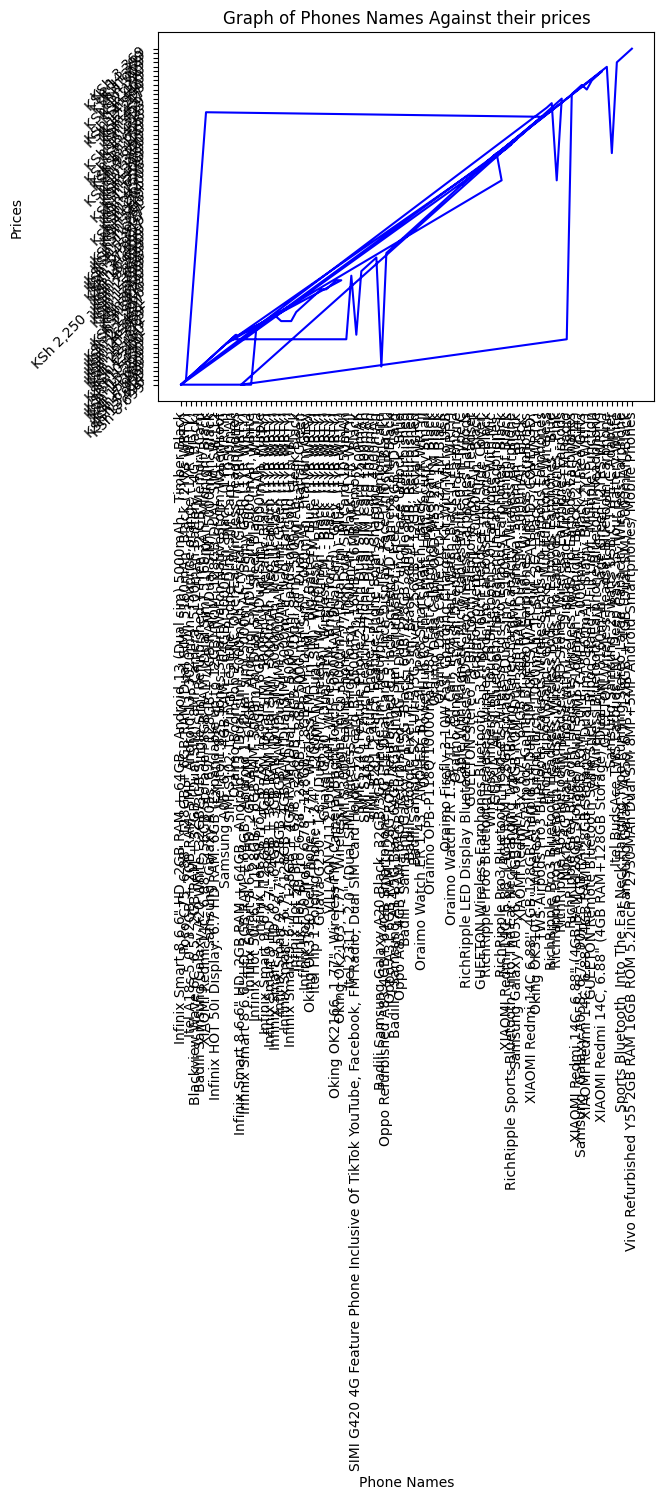

In [150]:
plt.plot(j_phone_names, j_phone_prices, color="blue")
#plt.plot(k_phone_names, k_phone_prices, color="red")
#Plotting a graph of phone names against Prices

plt.title("Graph of Phones Names Against their prices")
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.xlabel("Phone Names")
plt.ylabel("Prices")

plt.show()

In [153]:
#Average discount per category
v_jumia_data = jumia_data["Phone"].value_counts()
v_jumia_data


Phone
Infinix Smart 8 6.6" HD, 2GB RAM + 64GB , Android 13 (Dual sim) 5000mAh - Timber Black          2
SIMI S102 1.77inch Feature Phone Dual SIM Card 1050mAh                                          2
Poco C75, 6.88", 128GB + 6GB RAM (Dual SIM), 5160mAh, Black (2YRs WRTY)                         1
Blackview Wave 6C, 6.5", 2GB RAM + 32GB (Dual SIM), 8MP Camera, 5100mAh Battery - 4G, Black.    1
Badili Samsung Galaxy A20 White, 32GB/3GB,Single Sim, Refurbished + Free 32 GB Memory Card      1
                                                                                               ..
GUEETON Stereo F9 Bluetooth Earphone  Power Headset                                             1
Oraimo Powerbank  20000mAh - Black                                                              1
GUEETON Wireless Earphones Bluetooth 5.3 Finger Touch Headset HIFI Slide Cover.                 1
RichRipple Pro6 Bluetooth Headsets Wireless Pods Pro Earpods Earphones - Black                  1
Wireless Finge

In [ ]:
v_kilimall_data = kilimall_data["Phone Name"].value_counts()
v_kilimall_data

Phone Name
Refurbished Vivo Y55 2GB RAM 16GB ROM 5.2inch " 2730 mAh Dual SIM 8MP+5MP Android Smartphones/ Mobile Phones                                                                                     1
Air Pro3 TWS Macaron Color Pro 3 earpods Earphone Wireless Bluetooth Earphone Bluetooth V5.0 Touch Control for all Smart phone                                                                   1
XIAOMI Redmi 14C 128GB Storage Upto 8(4+4)GB Ram 50MP AI Dual Camera Immersive 6.88" UHD Display Upto 120Hz Refresh Rate Dual Sim 5160mAh (typ) Battery Elegant glass back cover  Smart Phone    1
[New Arrival] Xiaomi Redmi 14C 6.74" 8GB RAM + 256GB Storage 4G Network Dual SIM 90Hz LCD Screen 50MP Camera 33W Type-C Charging 5160mAh Battery Fingerprin t& Face Smart Phones Phone           1
The latest hot selling P9 Pro Max TWS microphone noise cancelling bass subwoofer fashion wireless sports headphones                                                                              1
[CASHBACK FRID

In [157]:
# Calculate average discount per category
# ✅ Remove % and convert to float
jumia_data["Discount"] = jumia_data["Discount"].astype(str).str.replace("%", "").astype(float)

avg_discount_per_category = jumia_data.groupby("Phone")["Discount"].mean()
avg_discount_per_category

Phone
Badili - Google Pixel 7, Dual sim, Black, 8GB/128GB, Refurbished                              32.0
Badili - Samsung A14 5G,Black, 64GB/4GB,Single Sim, Refurbished + Free 128GB SD Card          37.0
Badili - Samsung Galaxy A71 5G ,Black, 6GB/128GB, Single Sim, Refurbished                     18.0
Badili Samsung Galaxy A20 Black, 32GB/3GB,Single Sim, Refurbished + Free 32 GB Memory Card    47.0
Badili Samsung Galaxy A20 White, 32GB/3GB,Single Sim, Refurbished + Free 32 GB Memory Card    47.0
                                                                                              ... 
Samsung  Galaxy A05s, 6.7", 128GB + 4GB RAM (Dual SIM), 5000mAh, Black                        51.0
Samsung A05, 6.7", 4GB RAM + 64GB, 5000mAh, Black  (1YR WRTY)                                 17.0
VILLAON V112 (Dual SIM), Wireless FM, Bright Torch - Black  (1YR WRTY)                        26.0
Wireless Fingerprint Touch Bluetooth 5.0 Earphone With Mic                                    49.0
XIAO